<a href="https://colab.research.google.com/github/Daz-Riza-Seriog/Tensorflow_ML/blob/main/2-Customise%20your%20Models/1-%20Week%201/1-Keras%20Functional%20API/Multiple_Inputs_and_outputs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


# The Keras functional API

 ## Coding tutorials
 #### [1. Multiple inputs and outputs](#coding_tutorial_1)
 #### [2. Tensors and Variables](#coding_tutorial_2)
 #### [3. Accessing model layers](#coding_tutorial_3)
 #### [4. Freezing layers](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Multiple inputs and outputs

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the acute inflammations dataset

The `acute inflammations` was created by a medical expert as a data set to test the expert system, which will perform the presumptive diagnosis of two diseases of the urinary system. You can find out more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations).

Attribute information:

Inputs:
- Temperature of patient : 35C-42C
- Occurrence of nausea : yes/no
- Lumbar pain : yes/no
- Urine pushing (continuous need for urination) : yes/no
- Micturition pains : yes/no
- Burning of urethra, itch, swelling of urethra outlet : yes/no

Outputs:
- decision 1: Inflammation of urinary bladder : yes/no
- decision 2: Nephritis of renal pelvis origin : yes/no

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1CDPQSqpI7OjNIgOERWaI-BlQMI6vjzb9

You should store this file in Drive for use in this Colab notebook.

#### Load the data

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
link = 'https://drive.google.com/file/d/1CDPQSqpI7OjNIgOERWaI-BlQMI6vjzb9/view'

import pandas as pd

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('diagnosis.csv')

In [ ]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# Load the dataset

from sklearn.model_selection import train_test_split

pd_dat = pd.read_csv('diagnosis.csv')
dataset = pd_dat.values

In [ ]:
pd_dat.head()

,0,1,2,3,4,5,6,7
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0


In [ ]:
# Build train and test data splits

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,:6], dataset[:,6:], test_size=0.33)

In [ ]:
# Assign training and testing inputs/outputs

temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test)

inflam_train, nephr_train = Y_train[:, 0], Y_train[:, 1]
inflam_test, nephr_test = Y_test[:, 0], Y_test[:, 1]

#### Build the model

In [ ]:
# Build the input layers

from tensorflow.keras import Input, layers

shape_inputs=(1,)
temperature=Input(shape=shape_inputs,name="temp")
nausea_occurence=Input(shape=shape_inputs,name="nocc")
lumbar_pain=Input(shape=shape_inputs,name="lumbp")
urine_pushing=Input(shape=shape_inputs,name="up")
micturition_pains=Input(shape=shape_inputs,name="mict")
bis=Input(shape=shape_inputs,name="bis")


In [ ]:
# Create a list of all the inputs

list_inputs = [temperature, nausea_occurence, lumbar_pain, urine_pushing,
               micturition_pains, bis]

In [ ]:
# Merge all input features into a single large vector

x = layers.concatenate(list_inputs)

In [ ]:
# Use a logistic regression classifier for disease prediction

inflammation_pred = layers.Dense(1,activation="sigmoid",name="inflam")(x)
nephritis_pred = layers.Dense(1,activation="sigmoid",name="nephr")(x)

In [ ]:
# Create a list of all the outputs

list_outputs = [inflammation_pred, nephritis_pred]

In [ ]:
# Create the model object

model = tf.keras.Model(inputs=list_inputs,outputs=list_outputs)

#### Plot the model

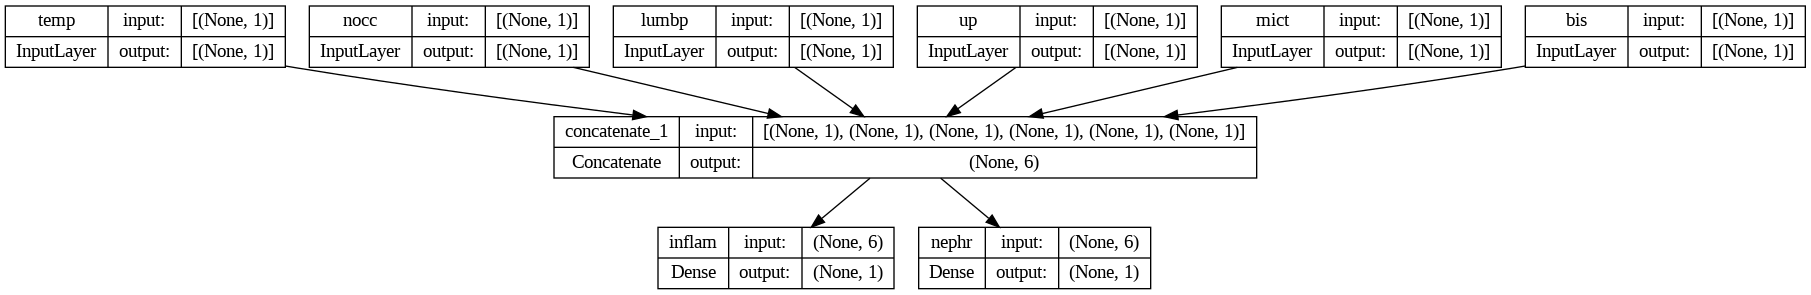

In [ ]:
# Display the multiple input/output model

tf.keras.utils.plot_model(model, "mulit_input_output_output_model.png",show_shapes=True)

#### Compile the model

In [ ]:
# Compile the model

model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3),
              loss={"inflam":"binary_crossentropy",
                    "nephr":"binary_crossentropy"},
              metrics={"inflam":["acc"],"nephr":["mae"]},
              loss_weights=[1., 0.2])

#### Fit the model

In [ ]:
# Define training inputs and outputs

inputs_train = {'temp': temp_train, 'nocc': nocc_train, 'lumbp': lumbp_train,
                'up': up_train, 'mict': mict_train, 'bis': bis_train}

outputs_train = {'inflam': inflam_train, 'nephr': nephr_train}

In [ ]:
# Train the model

history = model.fit(inputs_train,outputs_train,
                    epochs=1000,
                    batch_size=128,
                    verbose=False
                    )

#### Plot the learning curves

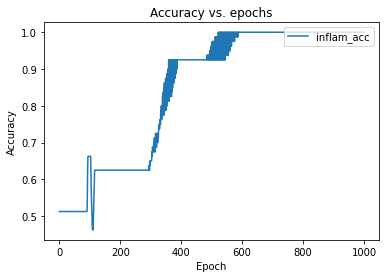

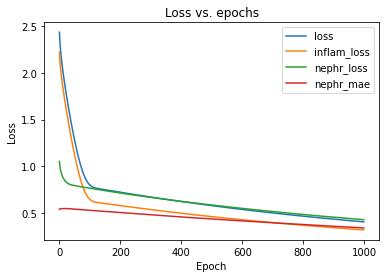

In [ ]:
# Plot the training accuracy

acc_keys = [k for k in history.history.keys() if k in ('inflam_acc', 'nephr_acc')]
loss_keys = [k for k in history.history.keys() if not k in acc_keys]

for k, v in history.history.items():
    if k in acc_keys:
        plt.figure(1)
        plt.plot(v)
    else:
        plt.figure(2)
        plt.plot(v)

plt.figure(1)
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(acc_keys, loc='upper right')

plt.figure(2)
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loss_keys, loc='upper right')

plt.show()

In [ ]:
# Evaluate the model

model.evaluate([temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test],[inflam_test, nephr_test],verbose=2)

2/2 - 1s - loss: 0.3995 - inflam_loss: 0.3080 - nephr_loss: 0.4574 - inflam_acc: 1.0000 - nephr_mae: 0.3600 - 903ms/epoch - 451ms/step


[0.3995036482810974,
 0.3080325722694397,
 0.4573554992675781,
 1.0,
 0.35996946692466736]